In [1]:
import os  
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model,Input
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [4]:
#Systolic Blood Pressure Data
#The data (X1, X2, X3) are for each patient, X1 = systolic blood pressure, X2 = age in years, X3 = weight in pounds
data = pd.read_csv('x02.txt', header=None, names=['BP', 'age', 'weight'])  
data.head()

,BP,age,weight
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196


In [5]:
data.describe()

,BP,age,weight
count,20.00000,20.000000,20.000000
mean,147.10000,60.500000,189.700000
std,13.88259,9.681779,17.838751
min,128.00000,45.000000,167.000000
25%,134.50000,52.000000,174.500000
50%,149.50000,61.500000,186.000000
75%,159.25000,67.750000,207.500000
max,168.00000,75.000000,220.000000


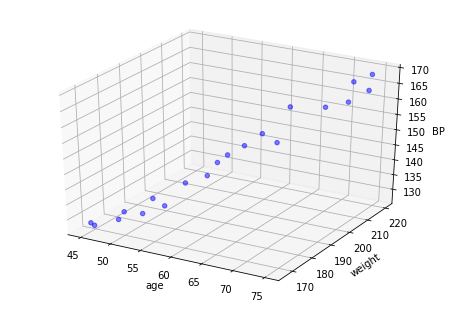

In [6]:
#3d plotting
fig = plt.figure()
ax=Axes3D(fig)
ax.scatter(data['age'],data['weight'],data['BP'],c='blue',marker='o',alpha=0.5)
ax.set_xlabel('age')
ax.set_ylabel('weight')
ax.set_zlabel('BP')
plt.show()

In [8]:
#feature normalization 
mean = data.mean()
std = data.std()
data_norm = (data - mean) / std  
data_norm.head()

,BP,age,weight
0,-1.087693,-0.877938,-0.936164
1,-0.295334,-0.154930,-0.319529
2,0.424993,0.671364,0.241048
3,1.073287,1.291085,1.194030
4,0.497025,0.361504,0.353164


In [19]:
feature_names = ["age", "weight"]
#data_x = data[feature_names]
data_x=data_norm[feature_names]
#data_y = data["BP"]
data_y = data_norm["BP"]
print ('input_shape: ', data_x.shape)
print ('output_shape: ', data_y.shape)
data_x1 = data_norm["age"]
data_x2 = data_norm["weight"]
print ('num_samples: ', data_x1.shape)

input_shape:  (20, 2)
output_shape:  (20,)
num_samples:  (20,)


In [20]:
## Reshape data
data_x=np.array(data_x)
data_y=np.array(data_y)

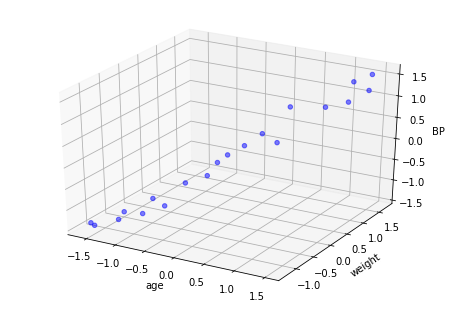

In [11]:
fig = plt.figure()
ax=Axes3D(fig)
ax.scatter(data_x1,data_x2,data_y,c='blue',marker='o',alpha=0.5)
ax.set_xlabel('age')
ax.set_ylabel('weight')
ax.set_zlabel('BP')
plt.show()

In [12]:
model = Sequential()
model.add(Dense(1, input_dim=2, kernel_initializer='normal', activation='relu'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [23]:
# to store logs
tensorboard = TensorBoard(log_dir="./multiple_lin_reg")
# Train the model
hist = model.fit(data_x,data_y, batch_size=1, epochs=150, shuffle=False,callbacks=[tensorboard])

Epoch 1/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5197 - mean_squared_error: 0.5197
Epoch 2/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5195 - mean_squared_error: 0.5195
Epoch 3/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5193 - mean_squared_error: 0.5193
Epoch 4/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5192 - mean_squared_error: 0.5192
Epoch 5/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5191 - mean_squared_error: 0.5191
Epoch 6/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5189 - mean_squared_error: 0.5189
Epoch 7/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5188 - mean_squared_error: 0.5188
Epoch 8/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5186 - mean_squared_error: 0.5186
Epoch 9/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5185 - mean_squared_error: 0.5185
Epoch 10/150
20/20 

20/20 [==============================] - 0s 1ms/step - loss: 0.5125 - mean_squared_error: 0.5125
Epoch 75/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5124 - mean_squared_error: 0.5124
Epoch 76/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5123 - mean_squared_error: 0.5123
Epoch 77/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5123 - mean_squared_error: 0.5123
Epoch 78/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5122 - mean_squared_error: 0.5122
Epoch 79/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5122 - mean_squared_error: 0.5122
Epoch 80/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5121 - mean_squared_error: 0.5121
Epoch 81/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5121 - mean_squared_error: 0.5121
Epoch 82/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5120 - mean_squared_error: 0.5120
Epoch 83/150
20/20 [===

Epoch 148/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5112 - mean_squared_error: 0.5112
Epoch 149/150
20/20 [==============================] - 0s 2ms/step - loss: 0.5112 - mean_squared_error: 0.5112
Epoch 150/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5112 - mean_squared_error: 0.5112


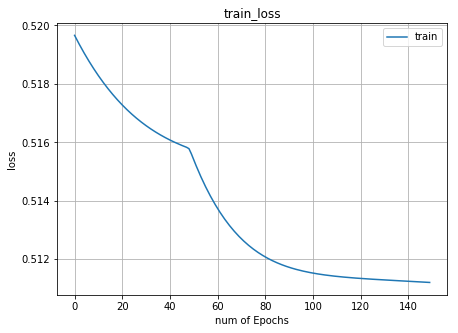

In [24]:
# visualizing losses and accuracy
num_epoch = 150
train_loss=hist.history['loss']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

In [26]:
#Model Evaluation
x_test = np.array(data_x[0:20])
y_test = np.array(data_y[0:20])
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test metrics:', score[1])


20/20 [==============================] - 0s 799us/step
Test Loss: 0.5111896395683289
Test metrics: 0.5111896395683289


In [41]:
#test 
x_test = np.array(data_x[2:3])
y_test = np.array(data_y[2:3])
y_test_predicted=model.predict(x_test)
print ('predicted_value: ', y_test_predicted)
print ('true_value: ', y_test)

predicted_value:  [[0.3448208]]
true_value:  [0.42499273]


In [70]:
#input data
ip_age = input("Enter age")
ip_age = int(ip_age)
ip_weight = input("Enter weight")
ip_weight = int(ip_weight)

Enter age70
Enter weight215


In [88]:
#normalizing data
ip_age_norm = (ip_age - mean[1]) / std[1]
ip_weight_norm = (ip_weight - mean[2]) / std[2]

ip_data = [[ip_age_norm,ip_weight_norm]]
print(ip_data)
ip_data1 = np.array(ip_data)
print(ip_data1)
#prediction
y = model.predict(ip_data2)
#converting back to actual value
y = y*std[0] + mean[0]
print(y)

[[0.9812246413250142, 1.4182606948294916]]
[[0.98122464 1.41826069]]
[[163.78296]]


In [77]:
#Weights
model.get_weights()
params=model.get_weights()
params
w = params[0]
b=params[1]

(100, 100)


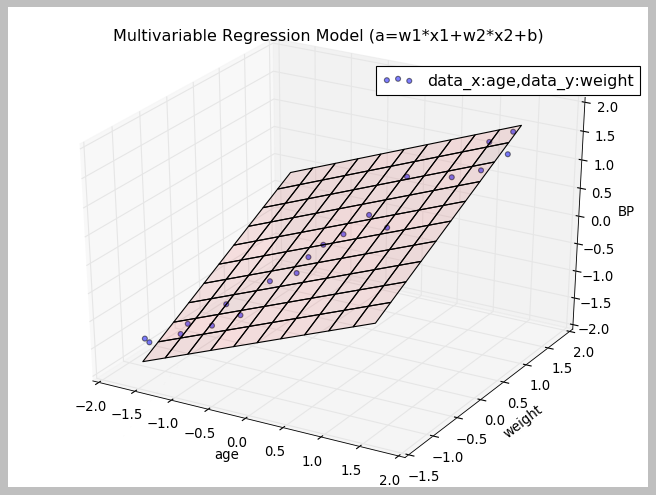

In [83]:

x1_surf,x2_surf= np.meshgrid(np.linspace(data_x1.min(),data_x1.max(),100),np.linspace(data_x2.min(),data_x2.max(),100))
Y_predicted_surf = x1_surf*w[0]+x2_surf*w[1]+b
print (Y_predicted_surf.shape)
fig = plt.figure()
ax=Axes3D(fig)
sct = ax.scatter(data_x1,data_x2,data_y,c='blue', marker='o',alpha=0.5)
plt_surf = ax.plot_surface(x1_surf,x2_surf,Y_predicted_surf,color='red',alpha = 0.1)
ax.set_xlabel('age')
ax.set_ylabel('weight')
ax.set_zlabel('BP')
plt.title('Multivariable Regression Model (a=w1*x1+w2*x2+b)')
plt.legend(['data_x:age,data_y:weight'],bbox_to_anchor=(1, 0.8),loc=4)
plt.show()

In [84]:
model.save('multiple_lin_reg_model.h5')

In [86]:
#from keras.models import load_model
#loaded_model=load_model('multiple_lin_reg_model.h5')
#loaded_model.get_weights()